## Dataset information:
https://islp.readthedocs.io/en/latest/datasets/Carseats.html

## Load libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

/var/folders/96/d0b81fgx57nf5q8xrlw36p1w0000gn/T/ipykernel_1582/3720411904.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Read the dataset

In [2]:
# Load the dataset
carseats = pd.read_csv('Carseats.csv')

# Check for missing values
print(carseats.isna().any())

# Convert 'Sales' into a binary 'High' variable
carseats['High'] = carseats['Sales'] > 8

# Convert categorical variables to dummies and drop specific columns
carseats = pd.get_dummies(carseats, columns=['ShelveLoc', 'Urban', 'US'])
carseats.drop(['ShelveLoc_Bad', 'Urban_No', 'US_No'], axis=1, inplace=True)
carseats.head()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,High,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,True,False,False,True,True
1,11.22,111,48,16,260,83,65,10,True,True,False,True,True
2,10.06,113,35,10,269,80,59,12,True,False,True,True,True
3,7.40,117,100,4,466,97,55,14,False,False,True,True,True
4,4.15,141,64,3,340,128,38,13,False,False,False,True,False


## Splitting the dataset

In [3]:
# Define features and target
X = carseats.drop(['High', 'Sales'], axis=1)
y = carseats['High']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Normalize the Data

In [4]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Random Forest for Feature Selection

In [5]:
# Apply Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

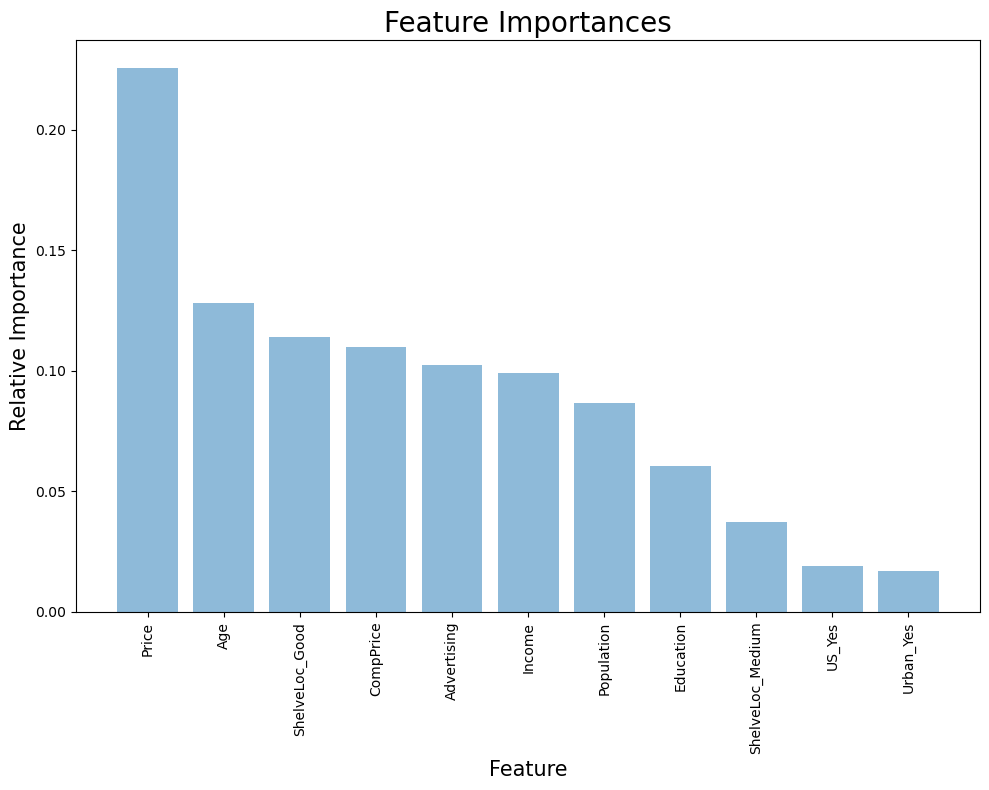

In [6]:
# Assuming rf is your trained RandomForestClassifier
feature_importances = rf.feature_importances_

# Adjusting feature_names to match your processed 'carseats' DataFrame
# Ensure this line comes after all preprocessing steps, including get_dummies and drop
feature_names = carseats.drop(['High', 'Sales'], axis=1).columns

# Sort the feature importances in descending order and get their indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Create the plot
plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

##  Hyperparameter Tuning and Cross-Validation

In [ ]:
# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
cv_rf.fit(X_train_scaled, y_train) 
#cv_rf is the model after GridSearchCV 
#has found the best parameters and refitted the model using these parameters on the entire training set

# Best parameters
print("Best parameters:", cv_rf.best_params_)


## Evaluate the model on the test set

In [ ]:
# Predictions on the test set
y_pred = cv_rf.predict(X_test_scaled)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

In [ ]:
#'cv_rf' is your trained classifier model and 'X_test_scaled' is your scaled test dataset
y_prob = cv_rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities of the positive class


In [ ]:
# ROC_AUC Curve
# 'cv_rf' is your fitted model and X_test_scaled is your test set
# plot_roc_curve(cv_rf, X_test_scaled, y_test)
# plt.title('ROC Curve')
# plt.show()

# Assuming y_prob contains your model predictions
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### next week's tutorial will be on boosting and feature selection. 
Try to look up feature selection before next tutorial.